In [5]:
#%% Modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import the chaosmagpy module
from chaosmagpy.model_utils import design_gauss, synth_values

Load SWARM datasættet SWARM.txt og plot 𝐵_𝜃, 𝐵_𝜑 og 𝐵_𝑟 som funktion af θ

In [6]:
# load SWARM data with pandas
swarm = pd.read_csv("SWARM_data.csv")
swarm.columns = ['theta', 'phi', 'radius', 'Bt', 'Bp', 'Br']

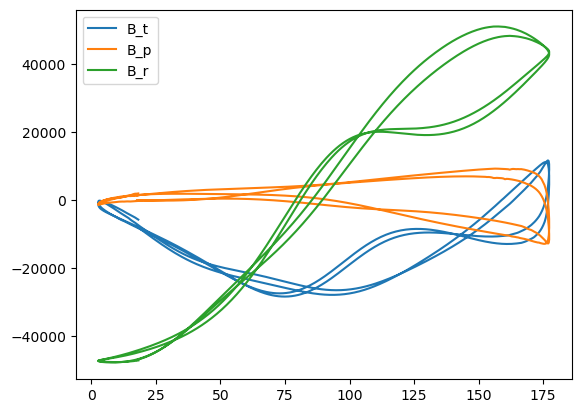

In [7]:
plt.plot(swarm.theta, swarm.Bt)
plt.plot(swarm.theta, swarm.Bp)
plt.plot(swarm.theta, swarm.Br)
plt.legend(["B_t", "B_p", "B_r"])

Load Gauss–koefficienter fra IGRF og brug Python funktionen design_gauss.py til at evaluere
IGRF modellen i koordinaterne fra SWARM datasættet og plot resultat

In [13]:
# load IGRF model parameters
m = np.loadtxt('IGRF13-2020.txt')

In [24]:
from IGRF_modelling import design_gauss

In [98]:
A_radius, A_theta, A_phi = design_gauss(swarm.radius/1000, swarm.theta, swarm.phi, nmax=13)

In [99]:
np.size(A_radius)

218400

In [100]:
np.size(m)

195

In [12]:
B_r = A_radius @ m
B_t = A_theta @ m
B_p = A_phi @ m

NameError: name 'A_radius' is not defined

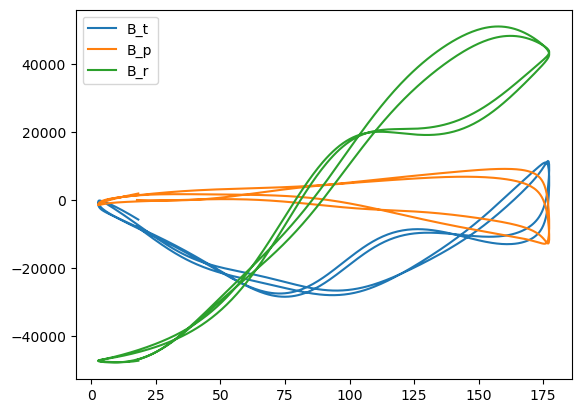

In [71]:
plt.plot(swarm.theta, B_t)
plt.plot(swarm.theta, B_p)
plt.plot(swarm.theta, B_r)
plt.legend(["B_t", "B_p", "B_r"])

Sammenlign dipol-modellens og IGRF-modellens evne til at forudse SWARM datasættet
– både visuelt og statistisk (vha. R i anden (R^2) analyse). Hvordan er dipol modellen

Text(0.5, 0, 'SWARM datapoints')

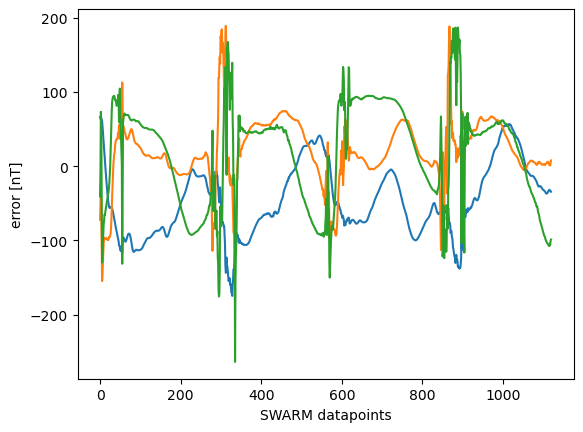

In [102]:
Br_error = swarm.Br - B_r
Bt_error = swarm.Bt - B_t
Bp_error = swarm.Bp - B_p

plt.figure()
plt.plot(Br_error)
plt.plot(Bt_error)
plt.plot(Bp_error)
plt.ylabel('error [nT]')
plt.xlabel('SWARM datapoints')

Evaluer IGRF i disse lokationer: (1) Toppen af Canada, (2) Midt i New York City, (3) Ved
ækvator i Colombia, (4) Midt i Argentina og (5) midten af Antarkti

In [2]:
90-40.781403420352184

49.218596579647816

In [28]:
loc_theta = [7.486745234308799, 49.218596579647816, 90, 35.12, 180]
loc_phi = [-62.747510121234285, -73.96656703768694, -75.15, -65.06, 0]
locs = ["canada", "new york city", "columbia", "argentina", "antarctica"]

In [11]:
A2_radius, A2_theta, A2_phi = design_gauss(6371, loc_theta, loc_phi, nmax=13)

c:\Users\45407\anaconda3\envs\DTU\Lib\site-packages\chaosmagpy\model_utils.py:795: UserWarning: Input coordinates include the poles.
  warnings.warn('Input coordinates include the poles.')


In [ ]:
b2_radius = A2_radius @ m
b2_theta = A2_theta @ m
b2_phi = A2_phi @ m

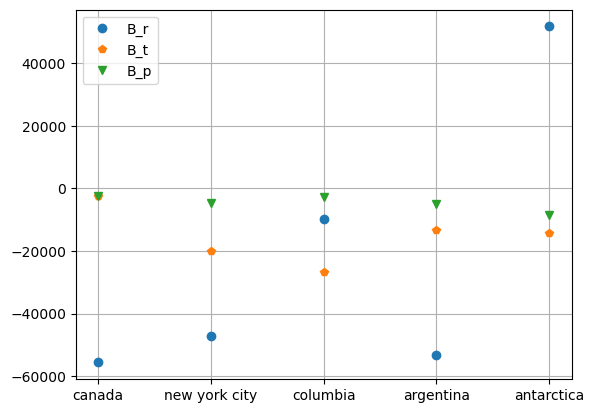

In [30]:
plt.plot(locs, b2_radius, marker = "o", linestyle = "none")
plt.plot(locs, b2_theta, marker = 'p', linestyle = "none")
plt.plot(locs, b2_phi, marker = "v", linestyle = "none")
plt.grid()
plt.legend(["B_r", "B_t", "B_p"])